In [299]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
%matplotlib inline

# Reading the file

In [300]:
df = pd.read_csv('titanic.csv')

In [301]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [302]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [303]:
df.shape

(891, 12)

# Data Cleansing : Null Analysis

In [304]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Age Analysis

In [305]:
print(f"Percentage of recrords with null age : {df['Age'].isnull().sum()/df.shape[0]*100} and its datatype is {df['Age'].dtype}")

Percentage of recrords with null age : 19.865319865319865 and its datatype is float64


/Users/sauravbhattacharyya/Desktop/DataScience2022/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


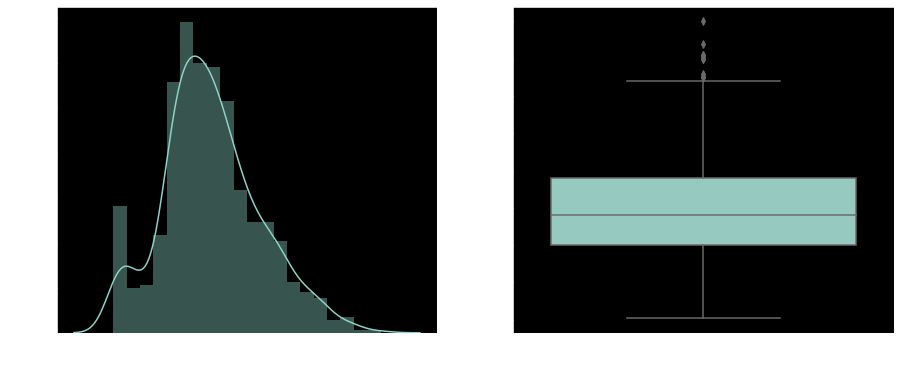

In [306]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df['Age'])

plt.subplot(1,2,2)
sns.boxplot(y = 'Age', data = df)
plt.show()

In [307]:
df['Age'].mean(), df['Age'].median()

(29.69911764705882, 28.0)

## Cabin Analysis

In [308]:
print(f"Percentage of recrords with null cabin : {df['Cabin'].isnull().sum()/df.shape[0]*100} and its datatype is {df['Cabin'].dtype}")  

Percentage of recrords with null cabin : 77.10437710437711 and its datatype is object


Conclusion: Ignore the attribute Cabin from the analysis.

## Embarked Analysis

In [309]:
print(f"Percentage of recrords with null embarked : {df['Embarked'].isnull().sum()/df.shape[0]*100} and its datatype is {df['Embarked'].dtype}")  

Percentage of recrords with null embarked : 0.22446689113355783 and its datatype is object


In [310]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [311]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [312]:
df['Embarked'].value_counts().idxmax()

'S'

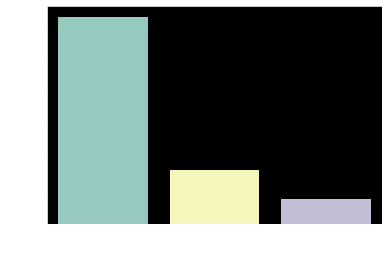

In [313]:
sns.countplot(x=df['Embarked'])
plt.show()

Conclusion: The 2 missing embaknment records can be filled up with the most frequent embarkation record.

# Handling the null values

In [314]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df['Embarked'].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)

In [315]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# EDA (Exploratory Data Analysis)

In [316]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [317]:
df.drop(columns=['PassengerId', 'Name','Ticket'], inplace=True)

# OHE

In [318]:
data = pd.get_dummies(df, columns=['Sex', 'Embarked'])
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [319]:
data.drop(columns=['Sex_male', 'Embarked_S'], inplace=True)

# Train test split

In [320]:
X = data.drop(columns=['Survived'])
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


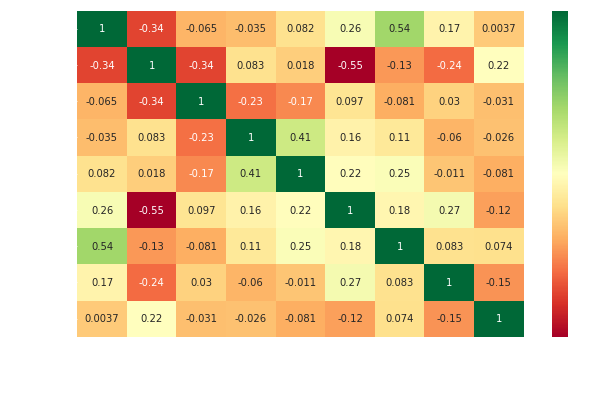

In [321]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.show()

# Apply Logistic Regression

In [322]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7932960893854749